## Getting Rid of Field Stars

-----------------
Author: Erin Motherway
Date: 7/6/2022

This notebook reads in a phot file, plots a CMD, and allows for the elimination of stars under a chosen cuttoff line. 

In [11]:
#import packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.table import Table
from getGaiaData import GaiaClusterMembers

In [21]:
#read in phot file
photData = pd.read_csv(r'C:\Users\Claire\Documents\Code\BASE9_utils\plotting\runs\NGC6819_run10_PSonly_mass1_step10x\NGC6819.phot',delim_whitespace=True)
df = pd.DataFrame(photData)
display(df)

,id,g_ps,r_ps,i_ps,z_ps,y_ps,sigg_ps,sigr_ps,sigi_ps,sigz_ps,sigy_ps,mass1,massRatio,stage1,CMprior,useDBI
0,100300001,12.0640,11.9650,10.1610,9.0880,8.5260,0.0100,-9.9000,-9.9000,-9.9000,-9.9000,1,0.0,1,0.013,1
1,108640002,13.2814,10.9032,9.0598,8.5864,8.8477,0.0100,0.0423,0.0100,0.0100,0.1720,1,0.0,1,0.014,1
2,109210003,99.9000,99.9000,99.9000,99.9000,99.9000,-9.9000,-9.9000,-9.9000,-9.9000,-9.9000,1,0.0,1,0.025,1
3,111380004,99.9000,99.9000,99.9000,99.9000,99.9000,-9.9000,-9.9000,-9.9000,-9.9000,-9.9000,1,0.0,1,0.033,1
4,100210005,99.9000,99.9000,99.9000,99.9000,99.9000,-9.9000,-9.9000,-9.9000,-9.9000,-9.9000,1,0.0,1,0.022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,122942576,21.5337,20.9281,20.6569,20.4802,20.2391,0.0226,0.0325,0.0453,0.0315,0.3061,1,0.0,1,0.081,1
2576,115232577,21.4135,20.8601,20.6260,20.5151,20.1972,0.0433,0.0396,0.0422,0.2331,0.1430,1,0.0,1,0.005,1
2577,116102578,21.4914,20.6895,20.4278,20.3339,19.9900,0.0442,0.0507,0.0304,0.0701,0.0737,1,0.0,1,0.436,1
2578,113912579,22.1363,20.9247,20.4499,20.0596,19.7728,0.0100,0.0518,0.0437,0.0609,0.0583,1,0.0,1,0.030,1


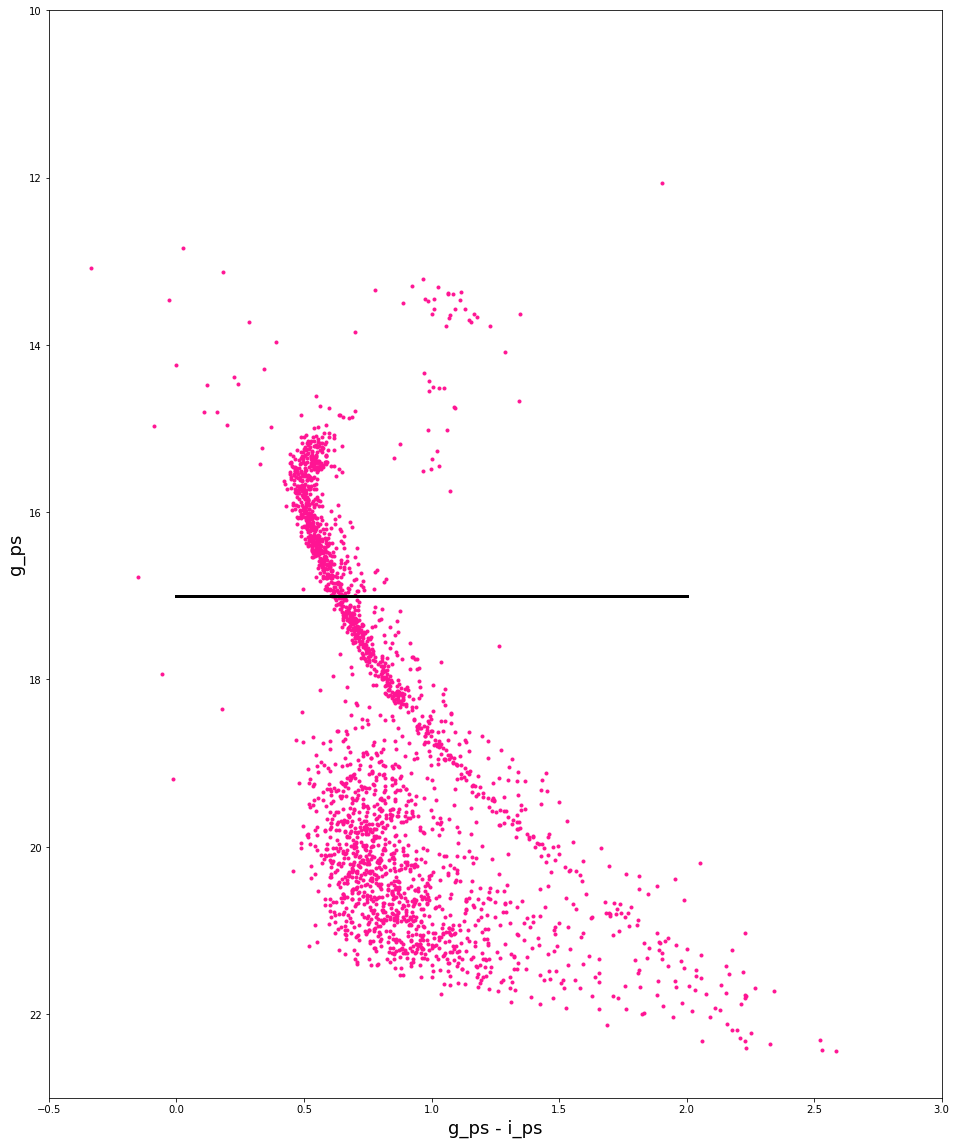

In [22]:
# plot CMD 
f, ax = plt.subplots(figsize=(16,20))
ax.plot(df['g_ps']-df['i_ps'],df['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)

#plot cuttoff line by guessing x and y values
x1=0
x2=2
y1=17
y2=17
ax.plot((x1, x2),(y1,y2),color='k',linewidth=3)


In [14]:
def function(input: float, input2: int):
    variable = input/input2

In [15]:
# print slope and intercept
m = (y2-y1)/(x2-x1)

print('The slope value for this line is',m)

b = y1 - m*x1

print('The intercept for this line is',b)


The slope value for this line is 0.0
The intercept for this line is 17.0


,id,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,H_2M,Ks_2M,sigg_ps,...,sigz_ps,sigy_ps,sigJ_2M,sigH_2M,sigKs_2M,1,massRatio,stage1,CMprior,useDBI
0,100300001,12.0640,11.9650,10.1610,9.0880,8.5260,6.758,5.819,5.538,0.0100,...,-9.900,-9.9000,0.020,0.018,0.021,1,0.0,1,0.013,1
1,108640002,13.2814,10.9032,9.0598,8.5864,8.8477,7.240,6.309,6.046,0.0100,...,0.010,0.1720,0.023,0.017,0.018,1,0.0,1,0.014,1
9,100630010,13.3022,12.9060,12.3800,12.0310,11.8690,10.660,10.074,9.924,0.0541,...,-9.900,-9.9000,0.038,0.040,0.032,1,0.0,1,0.007,1
10,107780011,13.3640,12.7440,12.2500,11.9300,11.7740,10.589,9.980,9.837,0.0100,...,-9.900,-9.9000,0.021,0.019,0.018,1,0.0,1,0.023,1
14,100330015,13.3066,12.6870,12.2810,12.0270,11.9090,10.790,10.275,10.155,0.0126,...,-9.900,-9.9000,0.021,0.023,0.035,1,0.0,1,0.038,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,108050707,16.9935,16.5443,16.3795,16.3170,16.2767,15.426,15.115,14.919,0.0100,...,0.010,0.0100,0.047,0.071,0.130,1,0.0,1,0.066,1
709,106370710,16.9967,16.5579,16.3900,16.3328,16.2853,15.308,15.021,14.829,0.0100,...,0.010,0.0100,0.042,0.073,0.133,1,0.0,1,0.051,1
722,101280723,16.9122,16.4197,16.2417,16.0981,16.1181,14.060,14.381,14.287,0.0100,...,0.029,0.0701,-9.900,0.057,0.095,1,0.0,1,0.047,1
885,100100886,16.7770,15.9378,16.9269,16.3198,16.5286,99.900,99.900,99.900,0.0100,...,0.010,0.0147,-9.900,-9.900,-9.900,1,0.0,1,0.052,1


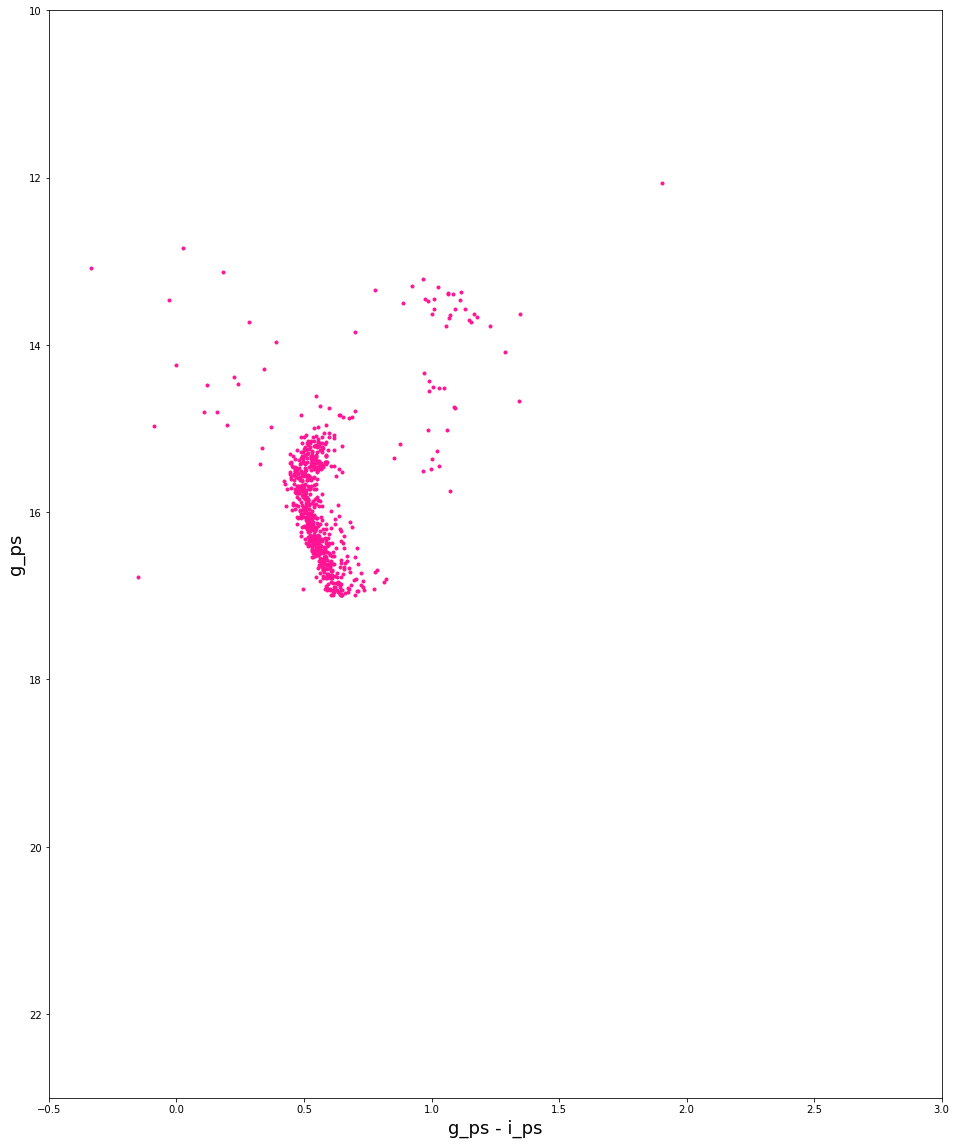

In [16]:
f, ax = plt.subplots(figsize=(16,20))
df2 = df[((m* (df['g_ps']-df['i_ps']) ) + b > df['g_ps'])]
ax.plot(df2['g_ps']-df2['i_ps'], df2['g_ps'], '.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)
df2

In [17]:
#copy this onto command line in gitbash with changed m and b values
#cat NGC6819.phot | awk '{if (NR == 1 || $5 < 3.0357*($5 - $7) + 15.928) print $0}' > NGC6819.new.phot

In [18]:
#write in new phot file
df2.to_csv("C:/Users/Claire/Documents/Code/BASE9_utils/getGaiaData/NGC6819.new.phot",sep=' ')
# foo= GaiaClusterMembers()
# foo.dumpPhotFile(Table.from_pandas(df2), filename= "C:/Users/Claire/Documents/Code/BASE9_utils/getGaiaData/NGC6819.new2.phot")

In [19]:
#read in new phot file
newPhotData = pd.read_csv('NGC6819.new.phot',delim_whitespace=True)
df3 = pd.DataFrame(newPhotData)

Text(0, 0.5, 'g_ps')

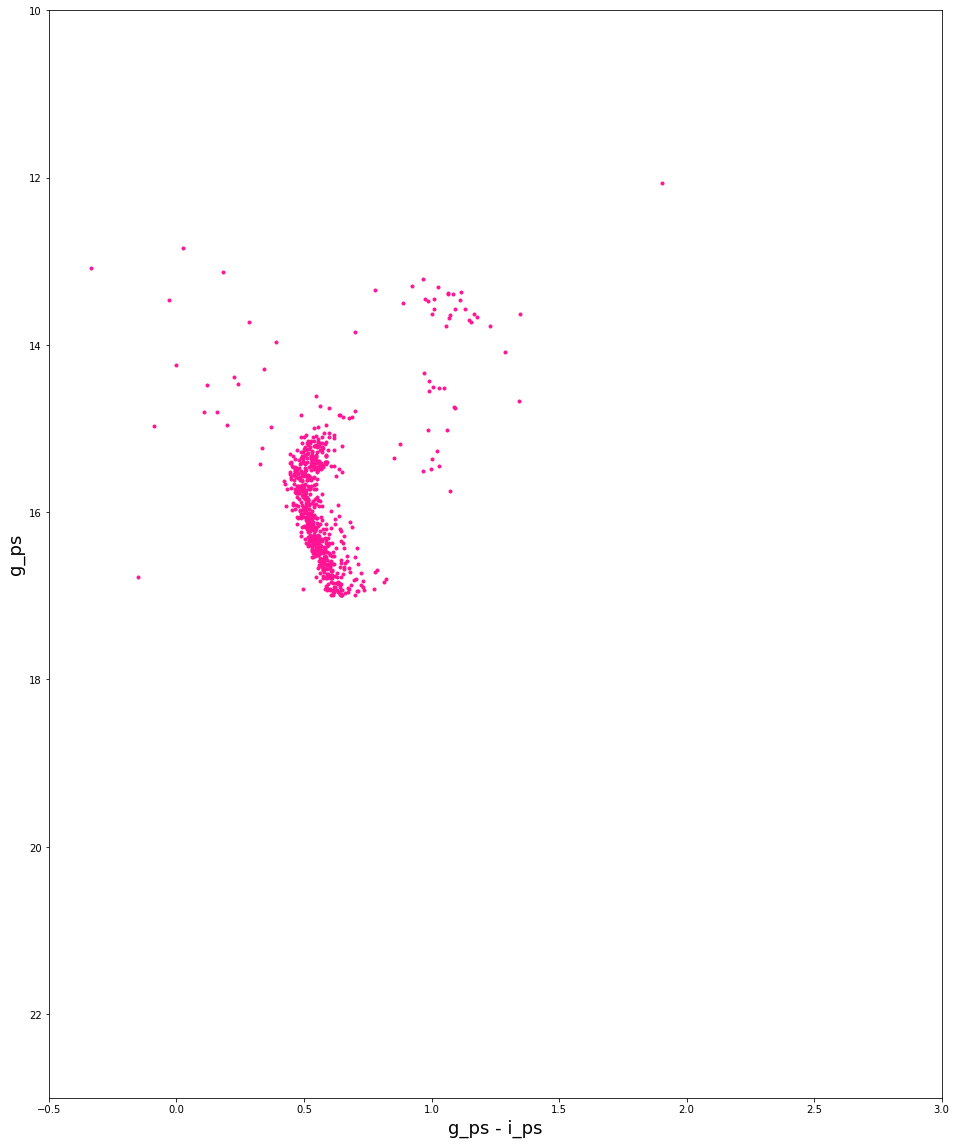

In [20]:
#plot new CMD
f, ax = plt.subplots(figsize=(16,20))
ax.plot(df3['g_ps']-df3['i_ps'],df3['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)